In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import os
import cv2

import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
import segmentation_models_pytorch as smp

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalMaxPooling2D

In [6]:
from keras.models import Sequential 
from keras.layers import Activation, Flatten
from keras.layers import Dense, Dropout

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

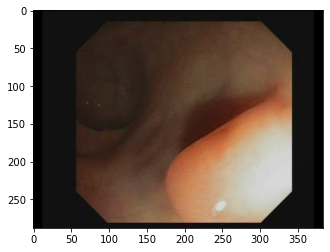

In [8]:
# Display a sample image
img=mpimg.imread('/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1.jpg')
imgplot = plt.imshow(img)

In [9]:
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    return image

### Save Each Filepath and Filename into List for Each Image

In [10]:
# filepath_list: 
# each element contains a list of two elements
# filepath[0] = filepath, filepath[1] = filename
filepath_list = []
file_annot_list = []
for filename in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/"):
    if filename.endswith(".jpg"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/", filename)
        filepath_list.append([filepath, filename])

for file_name in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/"):
    if file_name.endswith(".xml"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/", file_name)
        file_annot_list.append([filepath, file_name])


### Read and Save Each Image into Image List

In [11]:
image_list = []
for filepath in filepath_list:
    image = read_img(filepath[0])
    image_list.append(image)

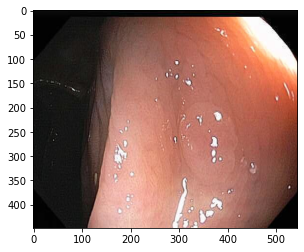

In [12]:
plt.imshow(image_list[0])

### Read and Save Each Annotation into Annotation List

In [13]:
annotation_list = []
for file in file_annot_list:
    annot = file[0]
    annotation_list.append(annot)

In [14]:
(annotation_list)

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/5848.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/21665.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/5690.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/27214.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/28127.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/162.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/23072.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/6399.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/7087.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/14806.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/25403.xml',
 '/Users/shreyah

In [15]:
# Finding the specific annotation in the xml file
a_list = []
for i in range(28773):
    tree = ET.parse(annotation_list[i])
    root = tree.getroot()
    object = root.find("object")
    if(object):
        polyp_name = object.find("name").text
        a_list.append(polyp_name)
    else:
        a_list.append("Not Specified")

In [16]:
# Finding the unique elements in the list
x = np.array(a_list)
print(np.unique(x))

['Not Specified' 'adenomatous' 'hyperplastic']


In [17]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (100, 100)) # Resizing the image to 224x224 dimention
    return (image)

In [18]:
im_list = []
for i in image_list:
    im_list.append(scale_resize_image(i))  

## Train Test Split

In [20]:
im_list_new = np.array(im_list[:100])
type(im_list_new)

numpy.ndarray

In [21]:
im_list_new

array([[[[0.0412549 , 0.0412549 , 0.0412549 ],
         [0.04508549, 0.04508549, 0.04508549],
         [0.04705883, 0.04705883, 0.04705883],
         ...,
         [0.04705883, 0.04705883, 0.04705883],
         [0.04705883, 0.04705883, 0.04705883],
         [0.04705883, 0.04705883, 0.04705883]],

        [[0.02917648, 0.02917648, 0.02917648],
         [0.03321412, 0.03321412, 0.03321412],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412]],

        [[0.01843137, 0.01843137, 0.01843137],
         [0.02257255, 0.02257255, 0.02257255],
         [0.02470588, 0.02470588, 0.02470588],
         ...,
         [0.02470588, 0.02470588, 0.02470588],
         [0.02470588, 0.02470588, 0.02470588],
         [0.02470588, 0.02470588, 0.02470588]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.01301961, 0.01301961, 0.01301961]

In [22]:
a_list_new = np.array(a_list[:100])
type(a_list_new)

numpy.ndarray

In [23]:
print(len(im_list_new))
print(len(a_list_new))

100
100


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
y = le.fit_transform(a_list_new)

In [26]:
X = im_list_new

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train[1].shape)

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [29]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 3,857,027
Trainable params: 3,857,027
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train,epochs=10,verbose=True)
#ValueError: Error when checking target: expected dense_13 to have 4 dimensions, but got array with shape (3, 1)

Train on 80 samples
Epoch 1/10
80/80 [==============================] - 1s 10ms/sample - loss: 3.9610 - accuracy: 0.4375
Epoch 2/10
80/80 [==============================] - 0s 1ms/sample - loss: 2.9165 - accuracy: 0.5500
Epoch 3/10
80/80 [==============================] - 0s 1ms/sample - loss: 2.6075 - accuracy: 0.6000
Epoch 4/10
80/80 [==============================] - 0s 1ms/sample - loss: 3.0754 - accuracy: 0.2125
Epoch 5/10
80/80 [==============================] - 0s 1ms/sample - loss: 1.1663 - accuracy: 0.5875
Epoch 6/10
80/80 [==============================] - 0s 1ms/sample - loss: 1.7677 - accuracy: 0.6250
Epoch 7/10
80/80 [==============================] - 0s 1ms/sample - loss: 3.9127 - accuracy: 0.3625
Epoch 8/10
80/80 [==============================] - 0s 1ms/sample - loss: 2.0042 - accuracy: 0.6125
Epoch 9/10
80/80 [==============================] - 0s 1ms/sample - loss: 0.9663 - accuracy: 0.5125
Epoch 10/10
80/80 [==============================] - 0s 1ms/sample - loss: 0.88

In [33]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  1.7105357646942139
accuracy:  0.6


### CNN

In [34]:
len_classes=3
dropout_rate=0.2
cnn_model = Sequential()
cnn_model.add(Lambda(lambda img: (img/255.0)-0.5, input_shape=(100, 100, 3)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=len_classes, kernel_size=1, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(GlobalMaxPooling2D())
cnn_model.add(Activation("softmax"))

In [35]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96, 96, 64)       

In [36]:
cnn_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

In [37]:
cnn_model.fit(im_list_new,y, epochs=10)

Epoch 1/10
100/100 [==============================] - 13s 130ms/step - loss: 1.2639 - accuracy: 0.2900
Epoch 2/10
100/100 [==============================] - 11s 107ms/step - loss: 1.1278 - accuracy: 0.4500
Epoch 3/10
100/100 [==============================] - 11s 109ms/step - loss: 0.9971 - accuracy: 0.5900
Epoch 4/10
100/100 [==============================] - 11s 109ms/step - loss: 0.9829 - accuracy: 0.5800
Epoch 5/10
100/100 [==============================] - 11s 112ms/step - loss: 0.8541 - accuracy: 0.6500
Epoch 6/10
100/100 [==============================] - 11s 108ms/step - loss: 0.9084 - accuracy: 0.6000
Epoch 7/10
100/100 [==============================] - 11s 108ms/step - loss: 0.8989 - accuracy: 0.5900
Epoch 8/10
100/100 [==============================] - 11s 107ms/step - loss: 0.8965 - accuracy: 0.5800
Epoch 9/10
100/100 [==============================] - 11s 107ms/step - loss: 0.9320 - accuracy: 0.5600
Epoch 10/10
100/100 [==============================] - 11s 107ms/step - l

In [38]:
loss, accuracy  = cnn_model.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  1.08199942111969
accuracy:  0.6000000238418579
